# PCA on Implied Volatility Surfaces: A Dimensionality Reduction Approach

## 1. **Motivation**

- Options prices are driven by different risk factors, primarily delta and implied volatility (IV).
- IV is not directly observable and encodes deviations from the assumed log-normal return distribution.
- Hedging IV-related risk requires understanding the covariance structure of IV movements.
- Challenges in estimating IV covariance matrices:
  - Measurement noise and bid-ask spreads.
  - Large dimensionality due to multiple strikes and expirations.

## 2. **A Proposed Solution: Dimensionality Reduction**

1. Reduce the dimensionality of the IV surface.
2. Compute the covariance matrix in reduced space.
3. Reconstruct a covariance matrix from the lower-rank factor structure.

## 3. **Simple PCA on Implied Volatility Surfaces**

### **Step 1: Data Acquisition & Preprocessing**

- Pull precomputed IV surfaces from the OptionMetrics database.
  - Identify data anomalies (e.g., IV discrepancies between puts and calls).
  - Justify using only out-of-the-money (OTM) options due to tighter spreads.
  - Discuss the OptionMetrics methodology for generating IV values.
- **Visualization:**
  - 3D plot of IV values interpolated across time-to-maturity and delta.

### **Step 2: IV Surface Exploration**

- Show IV curves across multiple dates and products.
- Identify common patterns in IV movements.

### **Step 3: Running PCA on IV Data**

- Construct the IV data matrix for PCA.
- **PCA component interpretation:**
  - First component: Level shifts.
  - Second component: Skew (slope).
  - Third component: Kurtosis (curvature).
  - Fourth component: Higher-order effects.
- **Efficiency considerations:**
  - Compare true SVD vs. randomized SVD implementations.
- **Weighting considerations:**
  - Should we use Vega-weighted covariance matrices?
  - Would results be more generalizable in IV space, applying Vega-weighting only in risk applications?

### **Step 4: Risk Adjustment Using Factor Structure**

1. Compute the covariance matrix in factor space.
2. **Position Visualization:**
   - Heat map of raw risk exposure.
3. **Factor-Based Decomposition:**
   - Show how individual options load onto PCA factors.
   - Aggregate portfolio risk in factor space.
4. **Covariance-Adjusted Risk View:**
   - Convert factor exposures to covariance-adjusted risk.
   - Plot reconstructed portfolio risk.

### **Step 5: Recap and Takeaways**

- The importance of starting with **IV data interpolated onto a consistent delta & time-to-maturity grid**.
- How PCA provides a **simplified view of IV risk**.
- How this approach stabilizes covariance estimates and enables better hedging.

## 4. **Extensions Beyond PCA**

### **1) Functional PCA (FPCA)**

- Parameterizes IV as a function of delta and time-to-maturity.
- Captures additional covariance information between nearby points.

### **2) Instrumented PCA (IPCA)**

- IPCA extends traditional PCA by allowing factor loadings to depend on observable characteristics.
- This enables dynamic adjustments in factor structures based on exogenous variables such as earnings risks, dividend risks, and macroeconomic indicators.
- For example, implied volatility surfaces may exhibit different factor structures around earnings announcements due to shifts in uncertainty and investor sentiment.
- By conditioning on these variables, IPCA provides a more flexible decomposition of implied volatility risk.
- A key question: Can lagged IV surfaces serve as relevant instruments to capture time-dependent market behavior?

### **3) Autoencoders for IV Decomposition**

- Captures nonlinear relationships in IV dynamics.
- Analogous to feature extraction in IV space, allowing for capturing latent structures beyond simple linear factors.

### **4) Transformer-Based IV Modeling**

- Generates potential future IV surfaces in a time-series setting.
- Would transformers be used to predict future IV surfaces, classify market regimes, or generate factor embeddings? How should tokenization, attention, and training mechanisms be designed?

## 5. **Open Questions & Further Considerations**

- How do alternative decomposition methods compare in practice?
- What do we lose in **linearity and portfolio construction properties** when using nonlinear models (FPCA, IPCA, Autoencoders, Transformers)?
- Should PCA be performed in IV space or Vega-weighted space?
- How do PCA-based risk models compare to industry-standard approaches?


#### **Task List for Implementing PCA on IV Surfaces in a Jupyter Notebook**

##### **1. Data Preparation**

- Load precomputed IV surfaces from the OptionMetrics database.
- Identify and handle missing or anomalous IV data (e.g., mismatches between put/call IVs).
- Select a subset of options:
  - Focus on OTM options due to tighter bid-ask spreads.
  - Filter options based on liquidity and time-to-maturity thresholds.
- Interpolate IV onto a structured grid:
  - Convert strikes to deltas for a standardized moneyness measure.
  - Interpolate IV values across time-to-maturity and delta dimensions.

##### **2. Data Exploration & Visualization**

- Generate 3D surface plots of IV against delta and time-to-maturity.
- Create time-series plots of IV for different moneyness levels.
- Show IV distributions across maturities to visualize common patterns.
- Examine IV autocorrelation across time and strike price.

##### **3. Construct Data Matrix for PCA**

- Define the data matrix where:
  - Rows correspond to different dates.
  - Columns correspond to IV values for different (delta, time-to-maturity) grid points.
- Normalize the data:
  - Consider standardizing IV values (subtract mean, divide by standard deviation) for better PCA performance.
  - Decide whether to use raw IV values or Vega-weighted IV values.

##### **4. Perform PCA**

- Compute PCA using Singular Value Decomposition (SVD) or a randomized SVD method for efficiency.
- Determine the optimal number of principal components using:
  - Explained variance ratio plots (scree plots).
  - Cumulative variance explained.
- Store factor loadings and principal component scores for later use.

##### **5. Interpret PCA Components**

- Visualize the first few principal components:
  - Plot the first 3-4 components across delta and time-to-maturity.
  - Compare these components to known IV movements (level, skew, curvature).
- Analyze time-series of factor scores:
  - Observe correlations with market volatility indices (e.g., VIX).
  - Detect regime shifts and patterns in factor dynamics.

##### **6. Efficiency Considerations**

- Compare computation time of different PCA implementations:
  - Full SVD vs. truncated SVD vs. randomized SVD.
- Optimize memory usage for handling large IV datasets.

##### **7. Weighting Considerations**

- Compare PCA results in:
  - Raw IV space.
  - Vega-weighted IV space.
- Determine whether weighting improves factor stability and interpretability.

##### **8. Develop Functions for Reproducibility**

- **`load_iv_data()`**: Load and preprocess IV data from OptionMetrics.
- **`interpolate_iv_surface()`**: Interpolate IV onto a structured (delta, time-to-maturity) grid.
- **`visualize_iv_surfaces()`**: Generate 3D plots and time-series IV visualizations.
- **`construct_pca_matrix()`**: Format the IV dataset into a matrix for PCA.
- **`run_pca()`**: Compute PCA using efficient decomposition methods.
- **`plot_pca_components()`**: Visualize principal components across delta/maturity.
- **`analyze_pca_scores()`**: Examine factor score time-series and correlations.
- **`compare_weighted_vs_unweighted_pca()`**: Analyze the effect of Vega-weighting on PCA factors.

This structured approach ensures clarity in performing the PCA analysis while keeping the workflow modular and reusable.


In [1]:
import zipfile
import pandas as pd
import numpy as np
import os
import glob
from IPython.display import display
from tqdm import tqdm

tqdm.pandas()

In [2]:
# Check if the CSV files already exist
if not glob.glob('testForwards/*.csv'):
  with zipfile.ZipFile('testForwards.zip', 'r') as zip_ref:
    zip_ref.extractall('testForwards')

if not glob.glob('testOptionsIV/*.csv'):
  with zipfile.ZipFile('testOptionsIV.zip', 'r') as zip_ref:
    zip_ref.extractall('testOptionsIV')
    
options_test_read = pd.read_csv(glob.glob('testOptionsIV/*.csv')[0], nrows=3)
forwards_test_read = pd.read_csv(glob.glob('testForwards/*.csv')[0], nrows=3)
display(list(enumerate(options_test_read.columns)), list(enumerate(forwards_test_read.columns)))

[(0, 'secid'),
 (1, 'date'),
 (2, 'days'),
 (3, 'delta'),
 (4, 'impl_volatility'),
 (5, 'impl_strike'),
 (6, 'impl_premium'),
 (7, 'dispersion'),
 (8, 'cp_flag'),
 (9, 'cusip'),
 (10, 'ticker'),
 (11, 'index_flag'),
 (12, 'exchange_d'),
 (13, 'class'),
 (14, 'issue_type'),
 (15, 'industry_group')]

[(0, 'secid'),
 (1, 'date'),
 (2, 'expiration'),
 (3, 'AMSettlement'),
 (4, 'ForwardPrice'),
 (5, 'cusip'),
 (6, 'ticker'),
 (7, 'sic'),
 (8, 'index_flag'),
 (9, 'exchange_d'),
 (10, 'class'),
 (11, 'issue_type'),
 (12, 'industry_group'),
 (13, 'issuer')]

In [3]:


# Read the CSV files
forwards_df = pd.read_csv(glob.glob('testForwards/*.csv')[0] , usecols=[1,2,4,6]) # 'date', 'ForwardPrice', 'ticker', 'expiration'
options_iv_df = pd.read_csv(glob.glob('testOptionsIV/*.csv')[0], usecols=[1,2,3,4,8,10]) # 'date', 'days', 'delta', 'impl_volatility', 'cp_flag', 'ticker'

forwards_df['date'] = pd.to_datetime(forwards_df['date'])
forwards_df['expiration'] = pd.to_datetime(forwards_df['expiration'])
forwards_df['days'] = (forwards_df['expiration'] - forwards_df['date']).dt.days

options_iv_df['date'] = pd.to_datetime(options_iv_df['date'])
options_iv_df.loc[options_iv_df.cp_flag == "P", 'delta'] = options_iv_df.loc[options_iv_df.cp_flag == "P", "delta"] + 100

forwards_df.drop(columns=['expiration'], inplace=True)

# Define the date range
start_date = '2015-01-01'
end_date = '2022-01-01'

# Filter the dataframes based on the date range
forwards_df = forwards_df[(forwards_df['date'] >= start_date) & (forwards_df['date'] <= end_date)]
options_iv_df = options_iv_df[(options_iv_df['date'] >= start_date) & (options_iv_df['date'] <= end_date)]


In [4]:
# Display the dataframes
forwards_df.shape, forwards_df.columns

((252999, 4),
 Index(['date', 'ForwardPrice', 'ticker', 'days'], dtype='object'))

In [5]:
options_iv_df.shape, options_iv_df.columns

((5274896, 6),
 Index(['date', 'days', 'delta', 'impl_volatility', 'cp_flag', 'ticker'], dtype='object'))

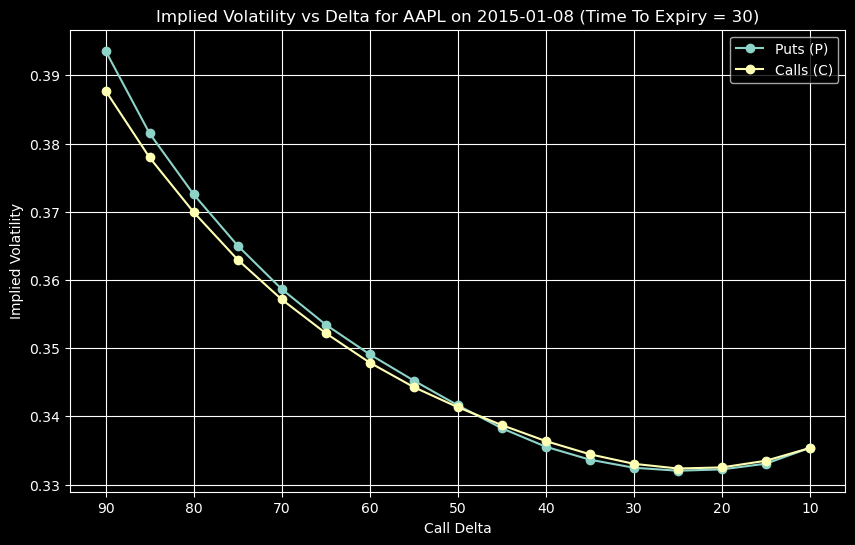

In [6]:
import matplotlib.pyplot as plt

date = '2015-01-08'
days_filter = 30
ticker = 'AAPL'
appl_single_day = options_iv_df.loc[(options_iv_df.ticker == ticker) & (options_iv_df.date == date)].dropna()

# Filter data for puts and calls based on 'days'
puts = appl_single_day[(appl_single_day['cp_flag'] == 'P') & (appl_single_day['days'] == days_filter)].copy()
calls = appl_single_day[(appl_single_day['cp_flag'] == 'C') & (appl_single_day['days'] == days_filter)]

# Adjust delta for puts
# puts['delta'] = puts['delta'] + 100

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(puts['delta'], puts['impl_volatility'], label='Puts (P)', marker='o')
plt.plot(calls['delta'], calls['impl_volatility'], label='Calls (C)', marker='o')

plt.xlabel('Call Delta')
plt.ylabel('Implied Volatility')
plt.title(f'Implied Volatility vs Delta for AAPL on {date} (Time To Expiry = {days_filter})')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Reverse the x-axis direction
plt.show()

In [7]:
from scipy.stats import norm

d1_cache = {delta : norm.ppf(delta/100) for delta in range(1, 101)}
time_moneyness_cache = {}

def calculate_vega(row):
    days = row['days']
    delta = row['delta']
    fwd = row['fwd']
    d1 = d1_cache[delta] if delta in d1_cache else norm.ppf(delta/100)
    if (d1,days) not in time_moneyness_cache:
        time_moneyness_cache[(d1,days)] = norm.pdf(d1)*np.sqrt(days/365)
    time_moneyness = time_moneyness_cache[(d1,days)]   
    vega = fwd*time_moneyness
    return vega

def precompute_forward_prices(forwards_df, unique_days):
    """
    Precomputes interpolated forward prices for each (date, ticker) combination 
    based on the given unique days in the options data.

    Parameters:
        forwards_df (pd.DataFrame): DataFrame containing forward prices with columns ['date', 'ForwardPrice', 'ticker', 'days']
        unique_days (np.array): Unique days to maturity from the options data.

    Returns:
        dict: A dictionary where keys are (date, ticker) pairs, and values are dictionaries mapping days to interpolated prices.
    """
    precomputed_values = {}

    for (date, ticker), group in forwards_df.groupby(['date', 'ticker']):
        group = group.sort_values(by="days")
        if len(group) > 1:
            interp_prices = np.interp(unique_days, group["days"], group["ForwardPrice"])
        else:
            interp_prices = np.full_like(unique_days, group["ForwardPrice"].values[0], dtype=np.float64)
        
        precomputed_values[(date, ticker)] = dict(zip(unique_days, interp_prices))

    return precomputed_values

def assign_forward_prices(options_iv_df, precomputed_values):
    """
    Assigns interpolated forward prices to the options data based on the precomputed values.

    Parameters:
        options_iv_df (pd.DataFrame): DataFrame containing options implied volatility data.
        precomputed_values (dict): Dictionary of precomputed forward prices.

    Returns:
        pd.DataFrame: options_iv_df with a new column 'ForwardPrice'.
    """
    options_iv_df["fwd"] = options_iv_df.progress_apply(
        lambda row: precomputed_values.get((row["date"], row["ticker"]), {}).get(row["days"], np.nan), axis=1
    )
    return options_iv_df

# Get unique days from options_iv_df
unique_days = np.array(options_iv_df['days'].unique())

# Step 1: Precompute interpolated forward prices
precomputed_values = precompute_forward_prices(forwards_df, unique_days)

# Step 2: Assign interpolated forward prices to options_iv_df
options_iv_df = assign_forward_prices(options_iv_df, precomputed_values)



100%|██████████| 5274896/5274896 [00:38<00:00, 136086.49it/s]


In [8]:
options_iv_df[(options_iv_df.date == '2015-01-02') & (options_iv_df.ticker == 'AAPL') & (options_iv_df.cp_flag == 'C') & (options_iv_df.delta == 50)]

,date,days,delta,impl_volatility,cp_flag,ticker,fwd
4449503,2015-01-02,10,50,0.271018,C,AAPL,109.322249
4449537,2015-01-02,30,50,0.333749,C,AAPL,109.186299
4449571,2015-01-02,60,50,0.317160,C,AAPL,108.900535
4449605,2015-01-02,91,50,0.301335,C,AAPL,108.926427
4449639,2015-01-02,122,50,0.300368,C,AAPL,108.869965
4449673,2015-01-02,152,50,0.301129,C,AAPL,108.748853
4449707,2015-01-02,182,50,0.302305,C,AAPL,108.627742
4449741,2015-01-02,273,50,0.305677,C,AAPL,108.292979
4449775,2015-01-02,365,50,0.306559,C,AAPL,108.013947
4449809,2015-01-02,547,50,0.310340,C,AAPL,107.809666


In [9]:
# Filter options_iv_df to only include rows where ticker is AAPL
aapl_iv_df = options_iv_df[options_iv_df['ticker'] == 'AAPL'].copy()

# Drop rows where days == 10
aapl_iv_df = aapl_iv_df[aapl_iv_df['days'] != 10]
aapl_iv_df['vega'] = aapl_iv_df.progress_apply(calculate_vega, axis=1)
aapl_iv_df['dollar_vol'] = aapl_iv_df['vega'] * aapl_iv_df['impl_volatility']

# Group by date and delta, then calculate the average implied volatility
aapl_iv_grouped = aapl_iv_df.groupby(['date', 'delta', 'days'])['dollar_vol'].mean().unstack().unstack().diff().dropna()

# Flatten the DataFrame such that there's a unique column for every delta value
aapl_iv_flattened = aapl_iv_grouped.reset_index()

# Display the resulting DataFrame
aapl_iv_flattened.set_index(aapl_iv_flattened.columns[0], inplace=True)
aapl_iv_flattened

100%|██████████| 599420/599420 [00:04<00:00, 139773.54it/s]


days              30                                                    \
delta             10        15        20        25        30        35   
(date, )                                                                 
2015-01-05  0.076798  0.110219  0.142193  0.171552  0.197383  0.220115   
2015-01-06  0.002574  0.014849  0.040318  0.063628  0.074489  0.076237   
2015-01-07 -0.023506 -0.037203 -0.057785 -0.075806 -0.084996 -0.087266   
2015-01-08 -0.017044 -0.022850 -0.022340 -0.022126 -0.025048 -0.029547   
2015-01-09  0.018050  0.035700  0.044698  0.048233  0.053323  0.061745   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.271333  0.307352  0.348000  0.388217  0.408340  0.400583   
2021-12-28  0.014362 -0.003197 -0.018224 -0.033785 -0.040823 -0.031786   
2021-12-29 -0.210305 -0.184233 -0.159010 -0.144342 -0.135770 -0.136502   
2021-12-30 -0.027103 -0.050832 -0.072968 -0.081623 -0.083968 -0.089796   
2021-12-31  0.006794 -0.011291 -0.071265 -0.147495 -0.210097 -0.243031   

days                                                ...       730            \
delta             40        45        50        55  ...        45        50   
(date, )                                            ...                       
2015-01-05  0.239375  0.254226  0.264158  0.270934  ... -0.066318 -0.014735   
2015-01-06  0.074180  0.070690  0.067024  0.062834  ...  0.456658  0.479406   
2015-01-07 -0.087620 -0.088237 -0.086259 -0.081223  ...  0.338389  0.305055   
2015-01-08 -0.032573 -0.032538 -0.032723 -0.035130  ...  0.380911  0.375688   
2015-01-09  0.069797  0.075057  0.078513  0.082253  ...  0.078049  0.113754   
...              ...       ...       ...       ...  ...       ...       ...   
2021-12-27  0.374403  0.351703  0.342160  0.335521  ...  0.424887  0.425524   
2021-12-28 -0.009955  0.010193  0.018918  0.024780  ... -0.166269 -0.171480   
2021-12-29 -0.142870 -0.144939 -0.142667 -0.149780  ... -0.351955 -0.370340   
2021-12-30 -0.097327 -0.099629 -0.091851 -0.072469  ... -0.373244 -0.352666   
2021-12-31 -0.232121 -0.185739 -0.149624 -0.148199  ... -0.582460 -0.579885   

days                                                                    \
delta             55        60        65        70        75        80   
(date, )                                                                 
2015-01-05 -0.007059 -0.054284 -0.110850 -0.125604 -0.088457 -0.018920   
2015-01-06  0.498426  0.530752  0.561401  0.564232  0.529535  0.466790   
2015-01-07  0.278965  0.269290  0.266541  0.260925  0.255105  0.238702   
2015-01-08  0.361247  0.358326  0.380282  0.394270  0.370799  0.314795   
2015-01-09  0.150389  0.184066  0.205374  0.205078  0.183970  0.155717   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.409871  0.386755  0.355471  0.313496  0.266783  0.223408   
2021-12-28 -0.169815 -0.163354 -0.155005 -0.146903 -0.140657 -0.139235   
2021-12-29 -0.370357 -0.343200 -0.287487 -0.218232 -0.142751 -0.063814   
2021-12-30 -0.332643 -0.324597 -0.335436 -0.354472 -0.373230 -0.382491   
2021-12-31 -0.547302 -0.503478 -0.454174 -0.397926 -0.338539 -0.280620   

days                            
delta             85        90  
(date, )                        
2015-01-05  0.038334  0.051192  
2015-01-06  0.390208  0.292228  
2015-01-07  0.187234  0.105602  
2015-01-08  0.264146  0.235462  
2015-01-09  0.141947  0.140850  
...              ...       ...  
2021-12-27  0.184694  0.145887  
2021-12-28 -0.138892 -0.124991  
2021-12-29  0.000438  0.029858  
2021-12-30 -0.359415 -0.287790  
2021-12-31 -0.220506 -0.155117  

[1762 rows x 170 columns]

In [10]:
from sklearn.decomposition import PCA

# Run PCA
pca = PCA()
pca.fit(aapl_iv_flattened)
aapl_iv_pca = pca.transform(aapl_iv_flattened)
explained_variance_ratio = pca.explained_variance_ratio_
pca_components = pca.components_


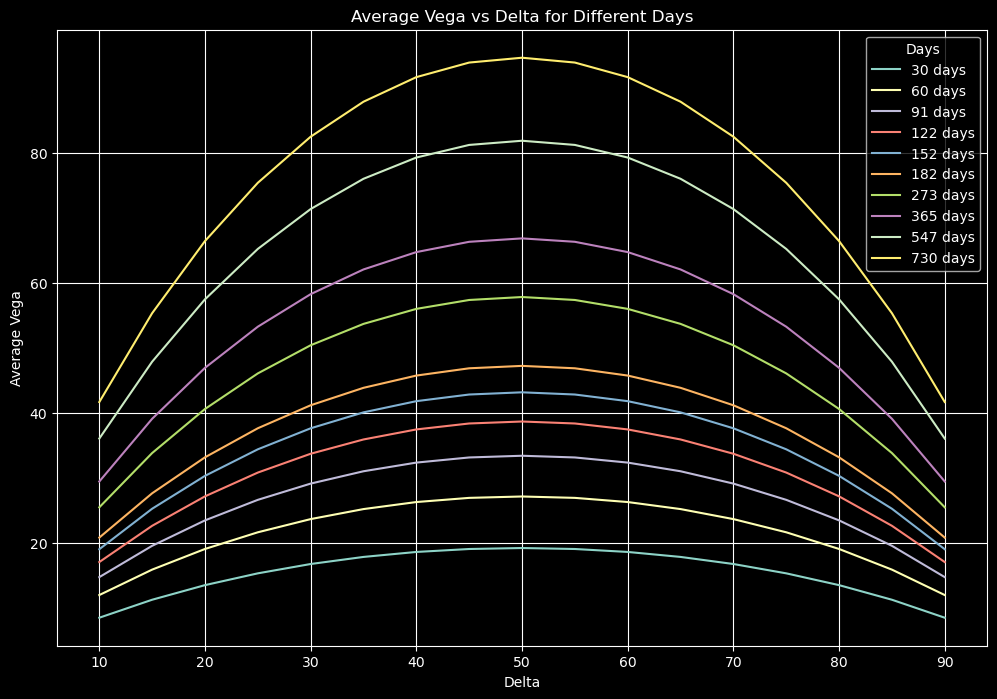

In [11]:
# Group by days and delta, then calculate the average vega
average_vega = aapl_iv_df.groupby(['days', 'delta'])['vega'].mean().unstack()

# Plot the data
plt.figure(figsize=(12, 8))
for days in average_vega.index:
  plt.plot(average_vega.columns, average_vega.loc[days], label=f'{days} days')

plt.xlabel('Delta')
plt.ylabel('Average Vega')
plt.title('Average Vega vs Delta for Different Days')
plt.legend(title='Days')
plt.grid(True)
plt.show()

In [12]:
cov = np.array([[1, -.7], [-.7, 1]])
pos = np.array([[2], [2]])
result = pos.T @ cov @ pos
print(result)

# np.linalg.inv(aapl_iv_flattened.cov())

[[2.4]]


In [13]:
np.linalg.inv(cov)@[2,2]

array([6.66666667, 6.66666667])

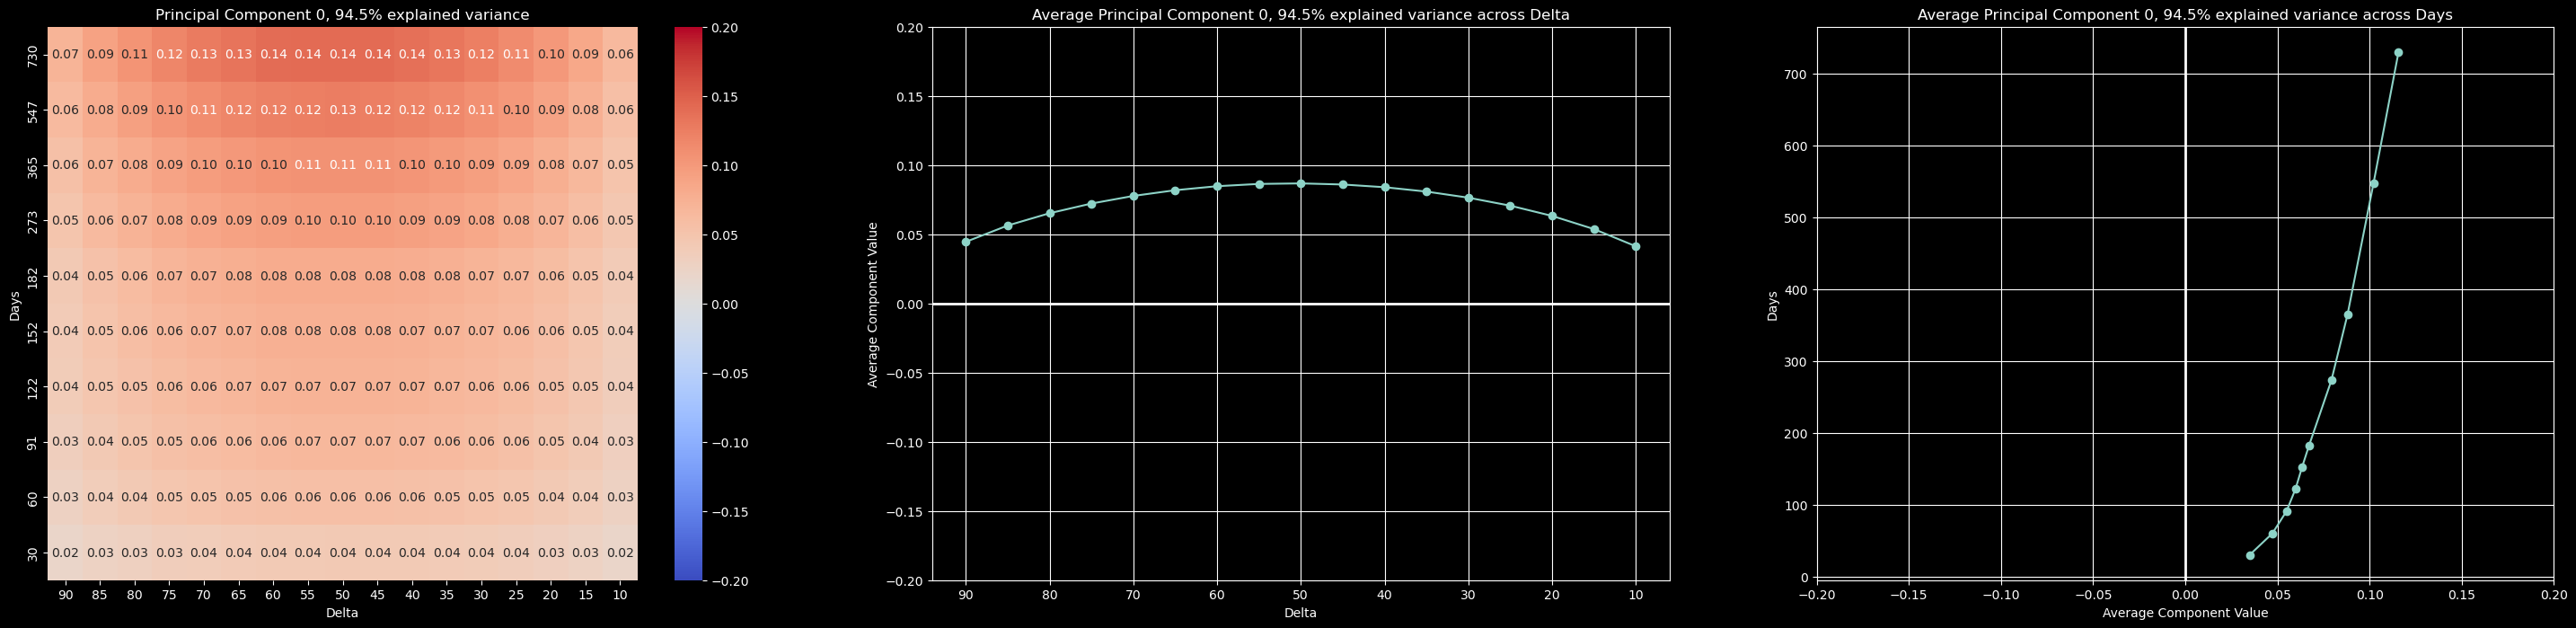

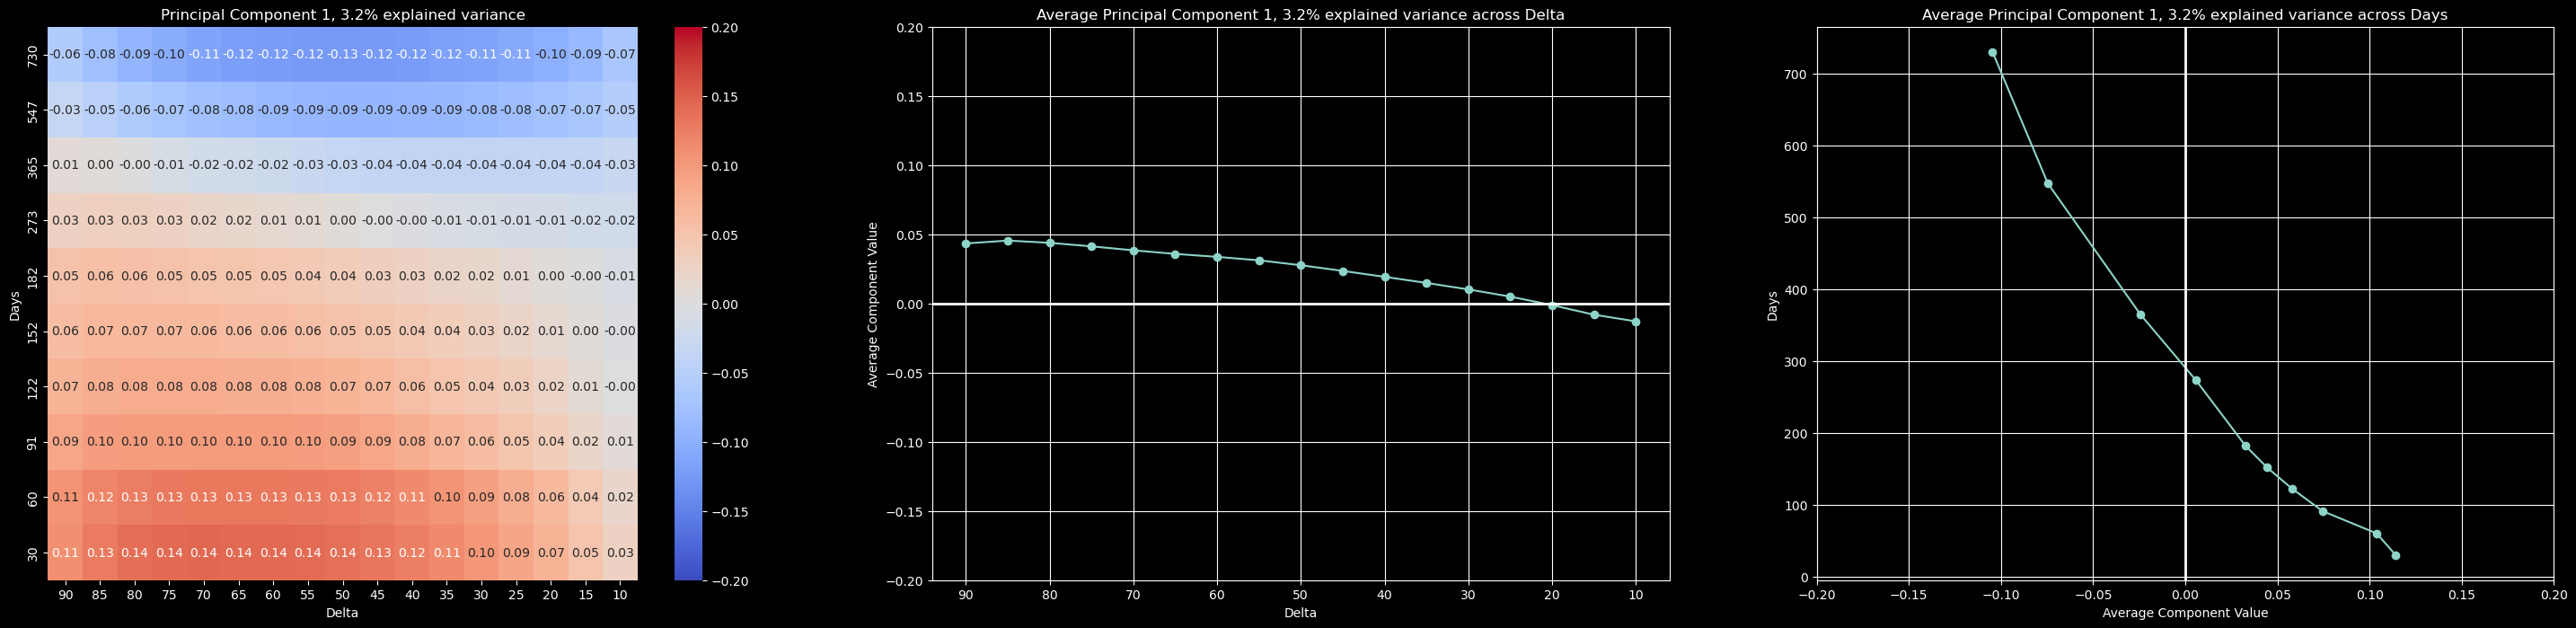

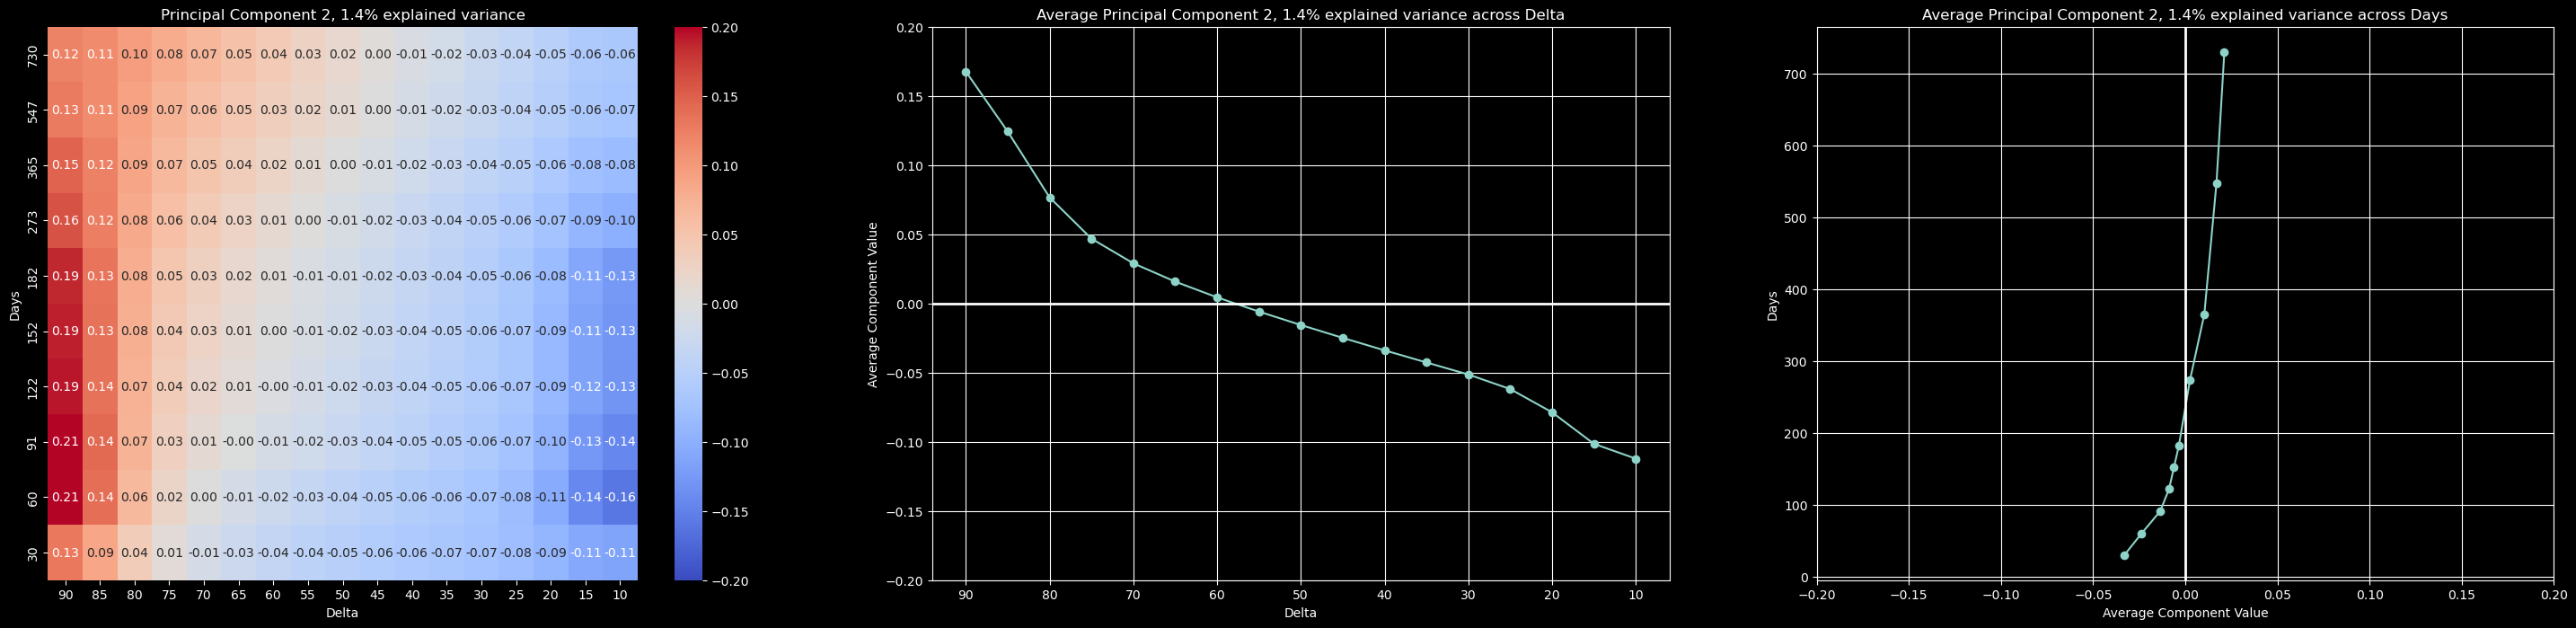

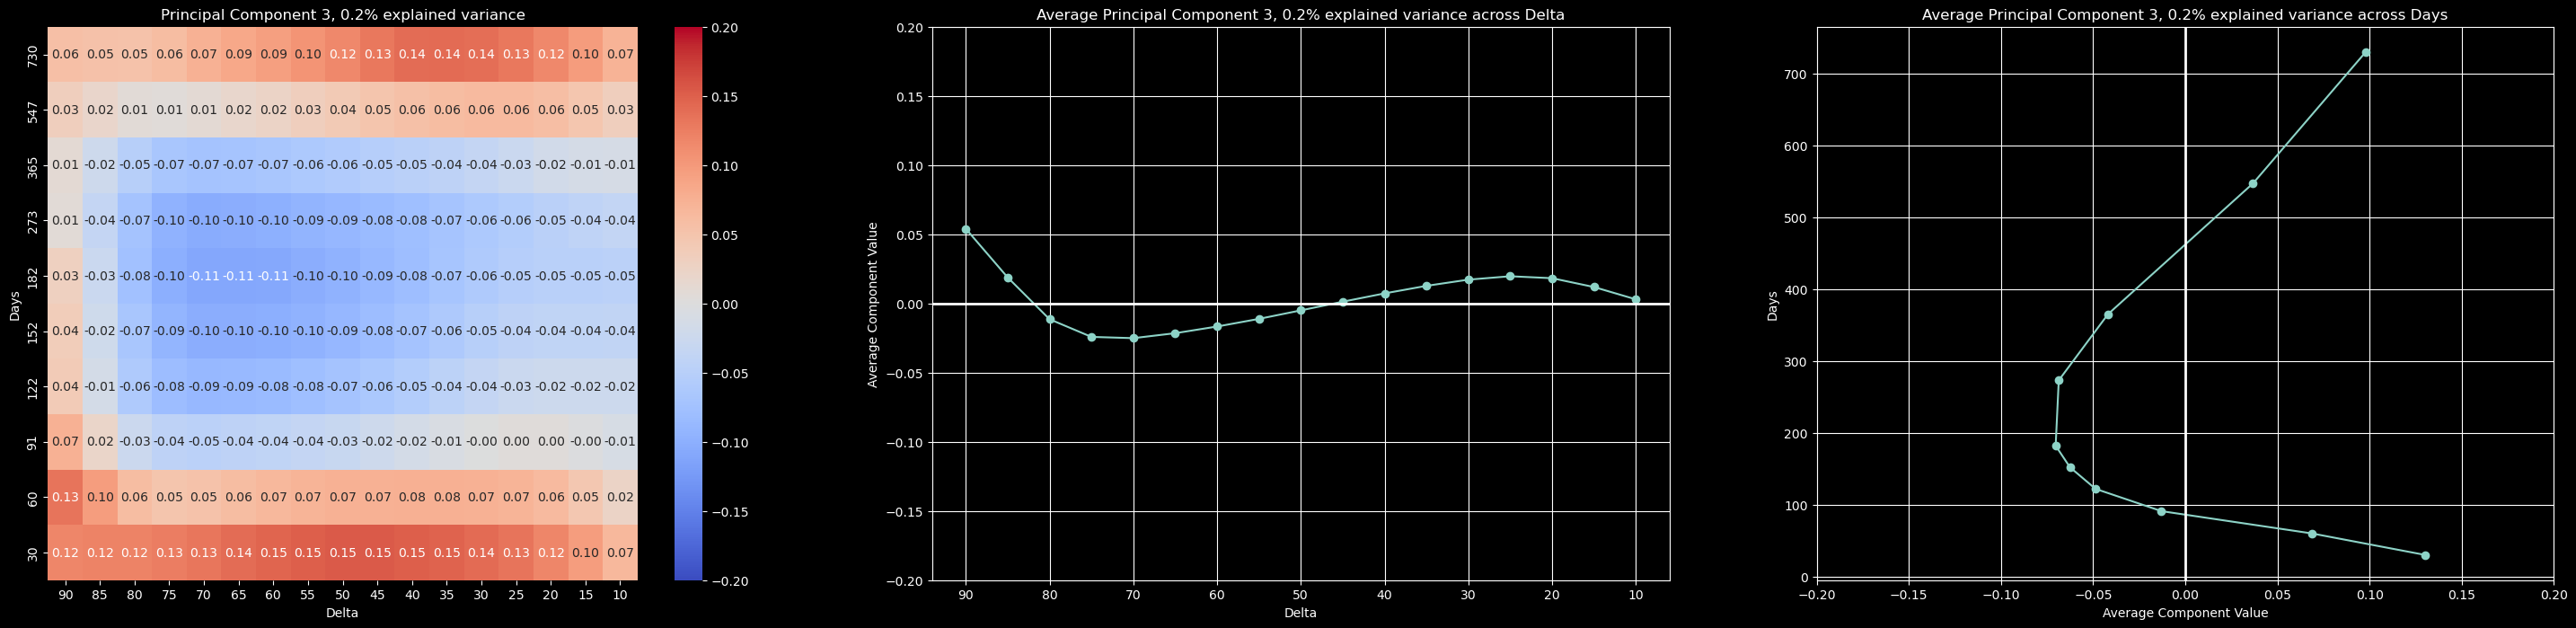

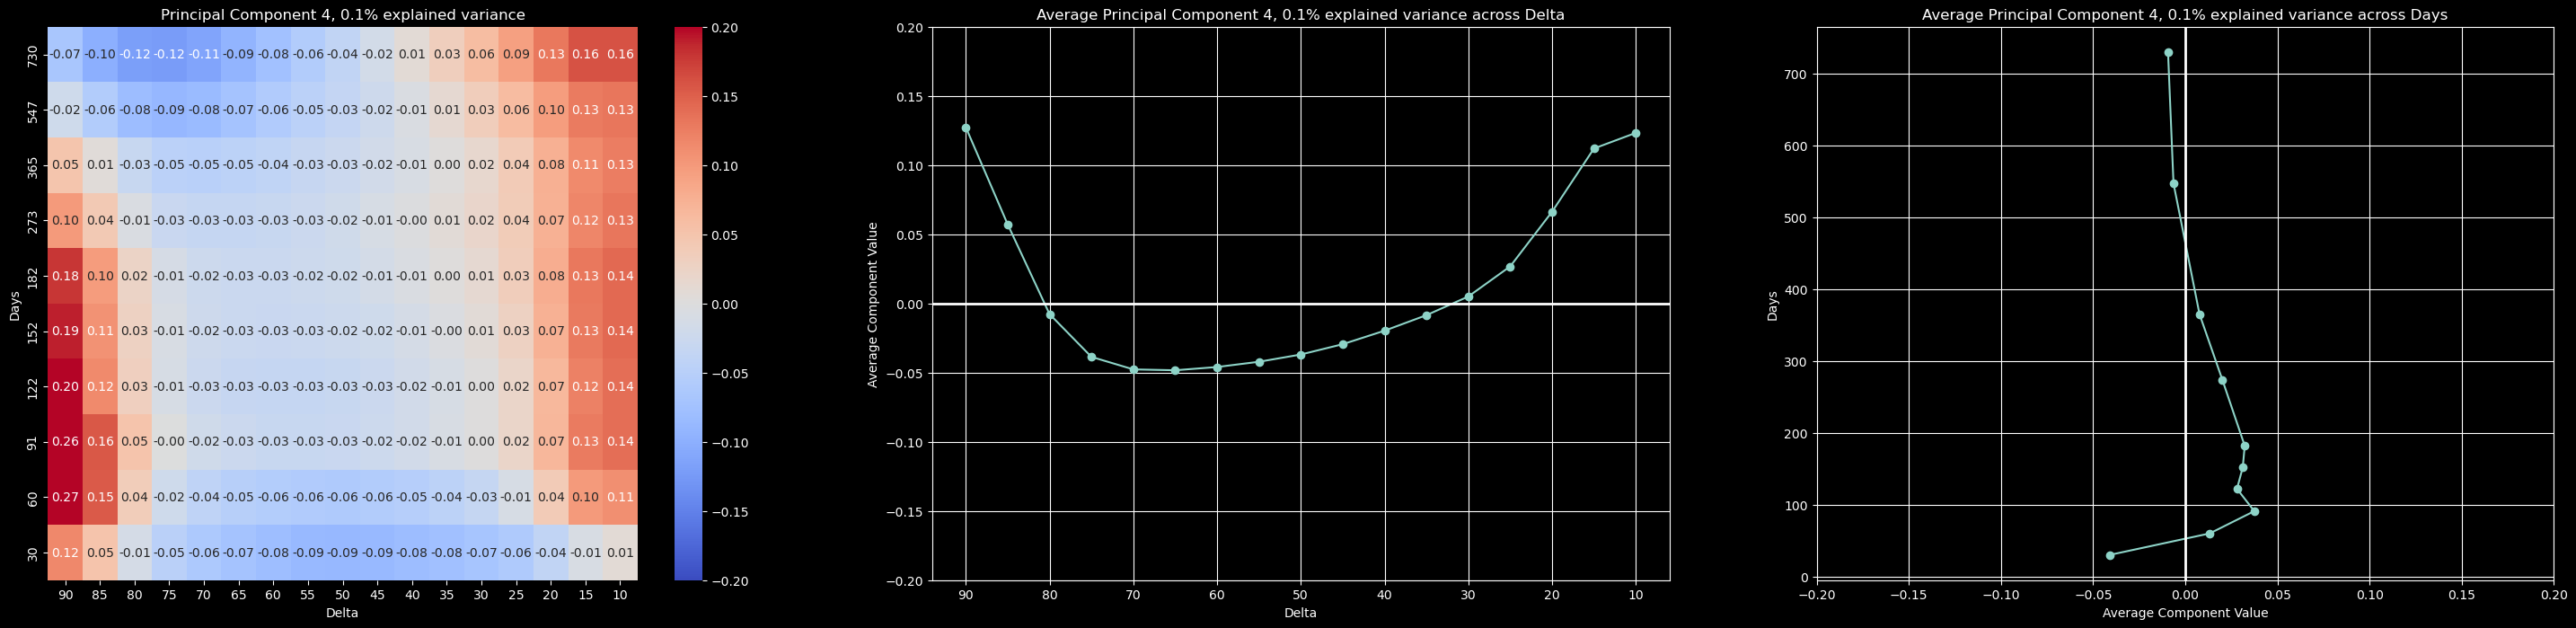

In [14]:
import seaborn as sns

def plot_component(component, title, scale=None):
  component_stacked = pd.DataFrame(component, index=aapl_iv_grouped.columns).stack()
  heatmap_data = component_stacked.unstack(level=1)
  heatmap_data.index = heatmap_data.index.droplevel(1)
  
  fig, axes = plt.subplots(1, 3, figsize=(36, 8))
  
  sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", vmin=scale[0] if scale else None, vmax=scale[1] if scale else None, ax=axes[0])
  axes[0].set_title(title)
  axes[0].set_xlabel('Delta')
  axes[0].set_ylabel('Days')
  axes[0].invert_yaxis()  # Reverse the y-axis direction
  axes[0].invert_xaxis()  # Reverse the x-axis direction
  
  avg_component_delta = component_stacked.groupby(level=1).mean()
  axes[1].plot(avg_component_delta.index, avg_component_delta.values, marker='o')
  axes[1].set_title(f'Average {title} across Delta')
  axes[1].set_xlabel('Delta')
  axes[1].set_ylabel('Average Component Value')
  axes[1].set_ylim(scale)  # Apply the scale to the y-axis
  axes[1].axhline(0, color='white', linewidth=2)  # Add a thick white line at y=0
  axes[1].invert_xaxis()  # Reverse the x-axis direction
  axes[1].grid(True)
  
  avg_component_days = component_stacked.groupby(level=0).mean()
  axes[2].plot(avg_component_days.values,avg_component_days.index, marker='o')
  axes[2].set_title(f'Average {title} across Days')
  axes[2].set_ylabel('Days')
  axes[2].set_xlabel('Average Component Value')
  axes[2].set_xlim(scale)  # Apply the scale to the y-axis
  axes[2].axvline(0, color='white', linewidth=2)  # Add a thick white line at y=0
  axes[2].grid(True)
  plt.show()
scale = (-.2, .2)
for i in range(5):
  plot_component(pca.components_[i], f'Principal Component {i}, {pca.explained_variance_ratio_[i]:0.1%} explained variance', scale)

In [15]:
cov_matrix = np.cov(aapl_iv_flattened.T)
cov_df = pd.DataFrame(cov_matrix, index=aapl_iv_flattened.columns, columns=aapl_iv_flattened.columns)

In [16]:
cov_df

days              30                                                    \
delta             10        15        20        25        30        35   
days delta                                                               
30   10     0.142952  0.165416  0.175798  0.185308  0.195080  0.203160   
     15     0.165416  0.199787  0.220118  0.236468  0.250999  0.262680   
     20     0.175798  0.220118  0.250264  0.273535  0.292550  0.307474   
     25     0.185308  0.236468  0.273535  0.302166  0.324931  0.342620   
     30     0.195080  0.250999  0.292550  0.324931  0.350694  0.370764   
...              ...       ...       ...       ...       ...       ...   
730  70     0.462357  0.583125  0.669315  0.737348  0.790885  0.830404   
     75     0.423530  0.535606  0.616082  0.679591  0.729489  0.766342   
     80     0.374624  0.475775  0.549044  0.606841  0.652158  0.685661   
     85     0.312523  0.399817  0.463934  0.514421  0.553861  0.583080   
     90     0.234336  0.303291  0.354972  0.395516  0.426988  0.450365   

days                                                ...       730            \
delta             40        45        50        55  ...        45        50   
days delta                                          ...                       
30   10     0.208708  0.211341  0.210853  0.207310  ...  0.529305  0.531812   
     15     0.270913  0.275302  0.275580  0.271855  ...  0.662521  0.666551   
     20     0.318148  0.324240  0.325461  0.321941  ...  0.756009  0.761448   
     25     0.355366  0.362911  0.364969  0.361694  ...  0.830017  0.836561   
     30     0.385313  0.394103  0.396878  0.393839  ...  0.888608  0.895969   
...              ...       ...       ...       ...  ...       ...       ...   
730  70     0.856980  0.871089  0.872742  0.862352  ...  3.313718  3.351519   
     75     0.791194  0.804501  0.806281  0.796934  ...  3.069840  3.105801   
     80     0.708342  0.720620  0.722548  0.714523  ...  2.758716  2.792088   
     85     0.602977  0.613910  0.615976  0.609602  ...  2.357600  2.387208   
     90     0.466414  0.475405  0.477473  0.473055  ...  1.831413  1.855464   

days                                                                    \
delta             55        60        65        70        75        80   
days delta                                                               
30   10     0.527170  0.514181  0.492473  0.462357  0.423530  0.374624   
     15     0.661615  0.646179  0.619866  0.583125  0.535606  0.475775   
     20     0.756609  0.739696  0.710389  0.669315  0.616082  0.549044   
     25     0.831773  0.813636  0.781894  0.737348  0.679591  0.606841   
     30     0.891140  0.871955  0.838231  0.790885  0.729489  0.652158   
...              ...       ...       ...       ...       ...       ...   
730  70     3.346277  3.290992  3.181773  3.019230  2.803011  2.524649   
     75     3.101747  3.051227  2.951278  2.803011  2.605642  2.350237   
     80     2.789522  2.744991  2.656130  2.524649  2.350237  2.124348   
     85     2.386211  2.349284  2.274513  2.163712  2.017183  1.828101   
     90     1.855806  1.828235  1.771400  1.686819  1.575014  1.431490   

days                            
delta             85        90  
days delta                      
30   10     0.312523  0.234336  
     15     0.399817  0.303291  
     20     0.463934  0.354972  
     25     0.514421  0.395516  
     30     0.553861  0.426988  
...              ...       ...  
730  70     2.163712  1.686819  
     75     2.017183  1.575014  
     80     1.828101  1.431490  
     85     1.579666  1.243427  
     90     1.243427  0.986151  

[170 rows x 170 columns]

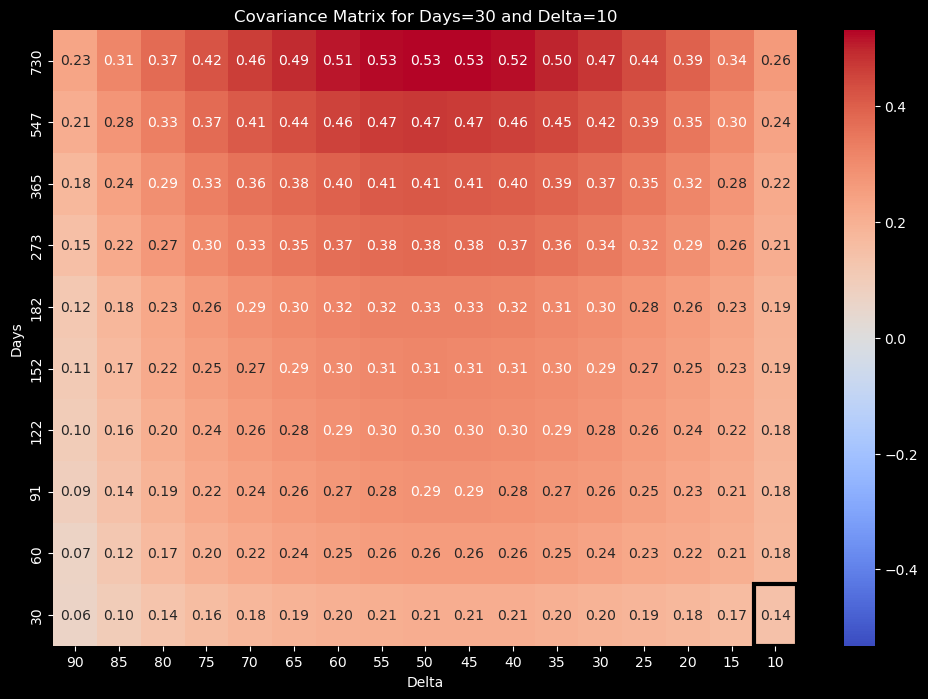

In [17]:
days_idx = 30
delta_idx = 10

def plot_single_option_covariance(cov_df, days_idx, delta_idx, scale=None):
  singlge_option_cov_df = cov_df[(days_idx, delta_idx)]
  if scale is None:
    max_val = singlge_option_cov_df.abs().max()
    scale = (-max_val, max_val)
  component_stacked = pd.DataFrame(singlge_option_cov_df, index=cov_df.columns).stack(future_stack=True)
  heatmap_data = component_stacked.unstack(level=1)
  heatmap_data.index = heatmap_data.index.droplevel(1)
  heatmap_data.columns = heatmap_data.columns.droplevel(0)

  plt.figure(figsize=(12, 8))
  ax = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", vmin=scale[0], vmax=scale[1])

  # Highlight the cell corresponding to the given indices
  patch_idx = heatmap_data.columns.get_loc(delta_idx), heatmap_data.index.get_loc(days_idx)
  ax.add_patch(plt.Rectangle(patch_idx, 1, 1, fill=False, edgecolor='Black', lw=3))

  plt.title(f'Covariance Matrix for Days={days_idx} and Delta={delta_idx}')
  plt.xlabel('Delta')
  plt.ylabel('Days')
  plt.gca().invert_yaxis()  # Reverse the y-axis direction
  plt.gca().invert_xaxis()  # Reverse the x-axis direction
  plt.show()

# Example usage
plot_single_option_covariance(cov_df, days_idx, delta_idx)

simple portfolio vega risk 64


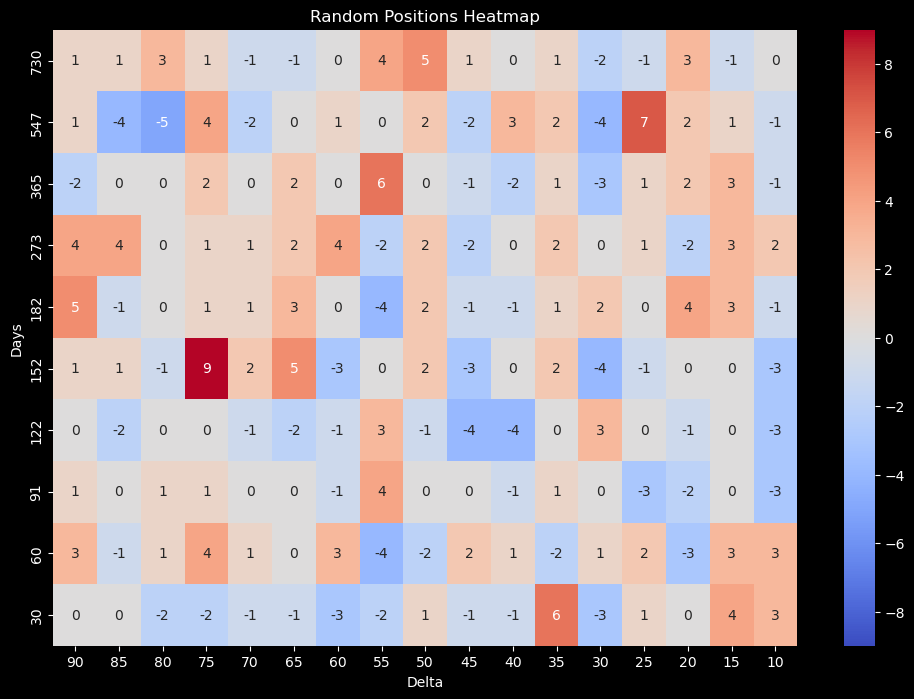

In [18]:
random_positions = np.random.normal(loc=0, scale=3, size=170).astype(int)
mapped_positions = pd.Series(random_positions, index=cov_df.columns)


def plot_heatmap(index_mapped_data, title, is_int=False, show_values=True):
  unstacked_data = index_mapped_data.unstack()
  max_abs_value = np.abs(unstacked_data.values).max()
  scale = (-max_abs_value, max_abs_value)
  plt.figure(figsize=(12, 8))
  sns.heatmap(unstacked_data, cmap='coolwarm', annot=show_values, fmt="d" if is_int else '.2f', vmin=scale[0], vmax=scale[1])
  plt.title(title)
  plt.xlabel('Delta')
  plt.ylabel('Days')
  plt.gca().invert_yaxis()  # Reverse the y-axis direction
  plt.gca().invert_xaxis()  # Reverse the x-axis direction
  plt.show()

print(f'simple portfolio vega risk {mapped_positions.sum()}')
plot_heatmap(mapped_positions, 'Random Positions Heatmap', is_int=True)

full-rank covariance IV risk 5276.312147891472


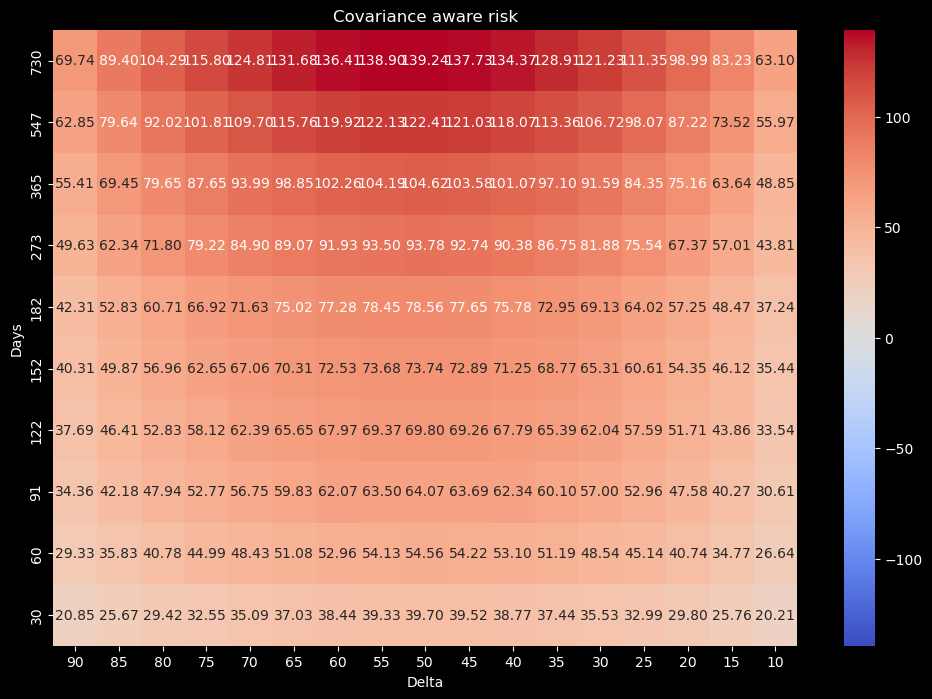

In [19]:
print(f'full-rank covariance IV risk {mapped_positions@cov_matrix@mapped_positions}')
plot_heatmap(pd.Series(mapped_positions@cov_matrix, index=cov_df.columns), "Covariance aware risk")

Reduced-rank covariance IV risk 5272.359405155425


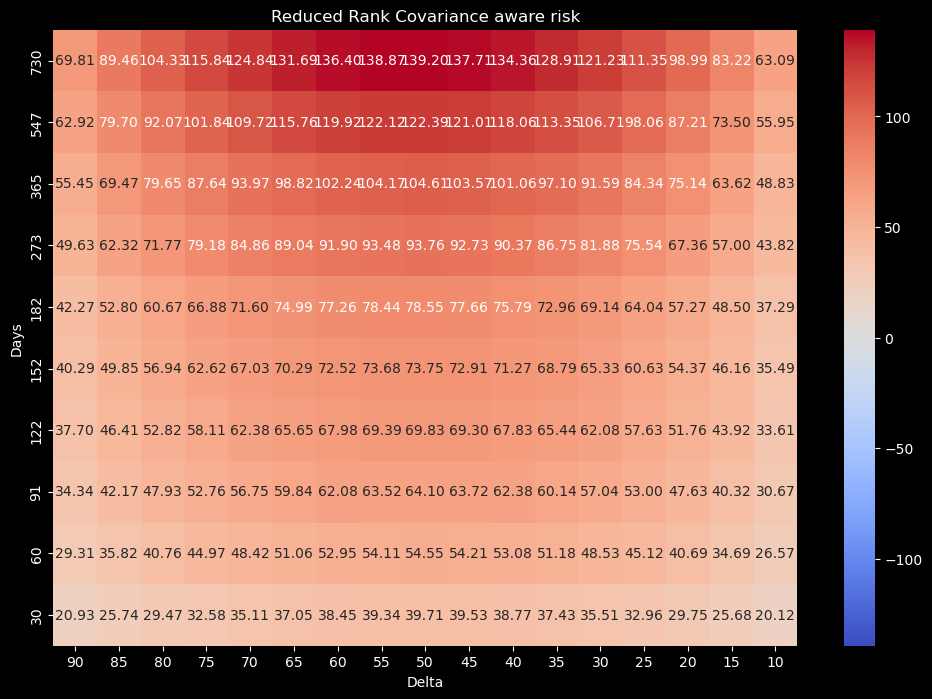

In [20]:
number_of_components = 5
reduced_rank_cov = (pca.components_[:number_of_components].T @ np.diag(pca.explained_variance_[:number_of_components]) @ pca.components_[:number_of_components])
reduced_rank_cov_inv = (pca.components_[:number_of_components].T @ np.diag(1/pca.explained_variance_[:number_of_components]) @ pca.components_[:number_of_components])

print(f'Reduced-rank covariance IV risk {mapped_positions@reduced_rank_cov@mapped_positions}')
plot_heatmap(pd.Series(mapped_positions@reduced_rank_cov, index=cov_df.columns), "Reduced Rank Covariance aware risk")

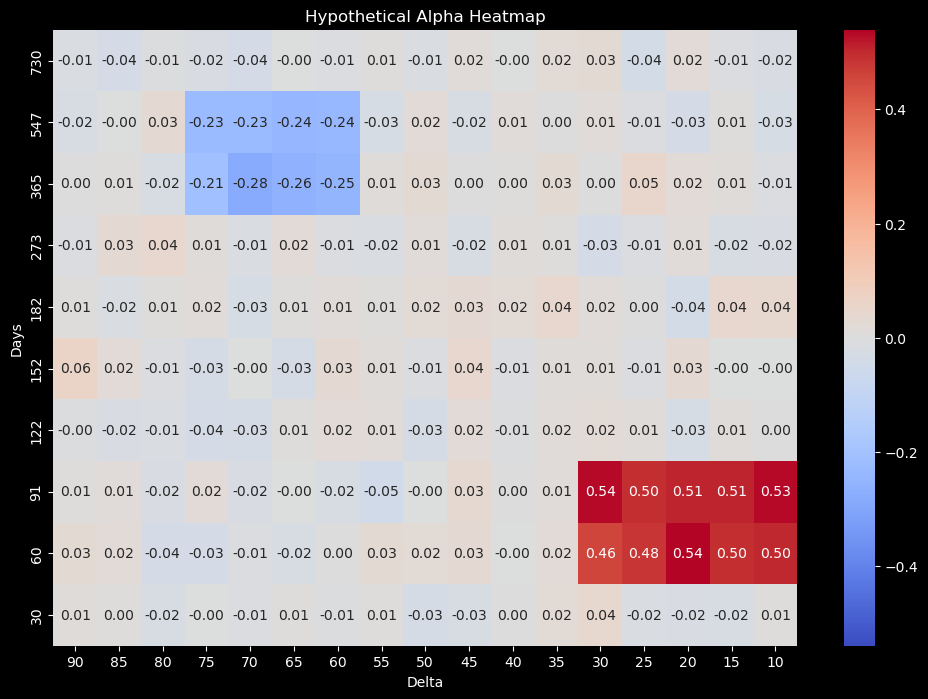

In [21]:
idx = pd.IndexSlice

random_evs = np.random.normal(loc=0, scale=.020, size=170)
mapped_alphas = pd.Series(random_evs, index=cov_df.columns)
mapped_alphas.loc[idx[60:91, 10:30]] += .5
mapped_alphas.loc[idx[365:547, 60:75]] -= .25
plot_heatmap(mapped_alphas, "Hypothetical Alpha Heatmap")


In [22]:
mapped_alphas @ np.linalg.inv(cov_matrix) @ mapped_alphas
mapped_alphas @ np.linalg.inv(reduced_rank_cov) @ mapped_alphas

np.float64(343776400471595.7)

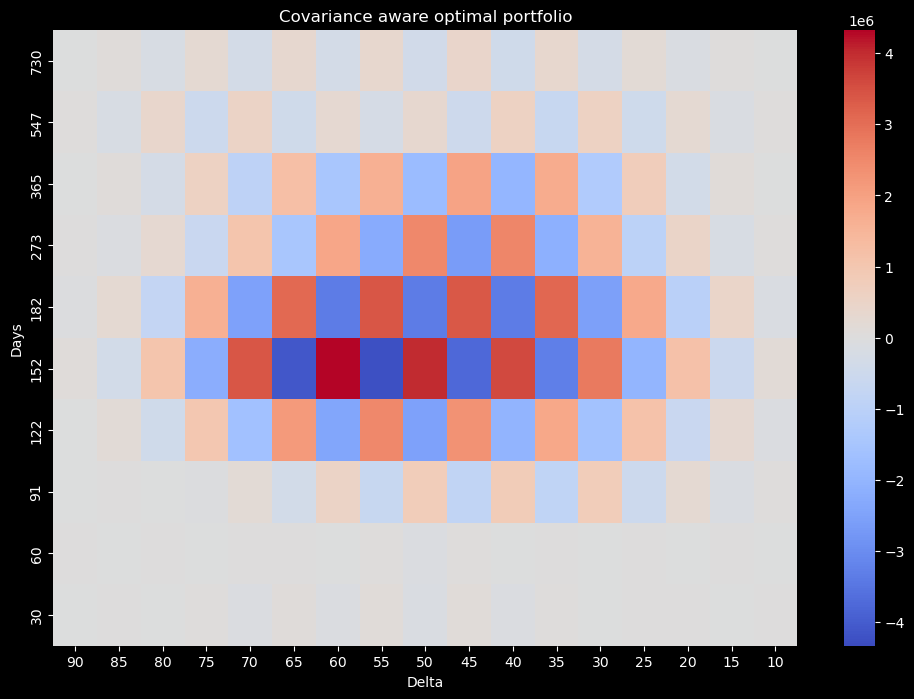

In [23]:
full_cov_opt_pf = pd.Series(mapped_alphas@np.linalg.inv(cov_matrix), index=cov_df.columns)
plot_heatmap(full_cov_opt_pf, "Covariance aware optimal portfolio", show_values=False)

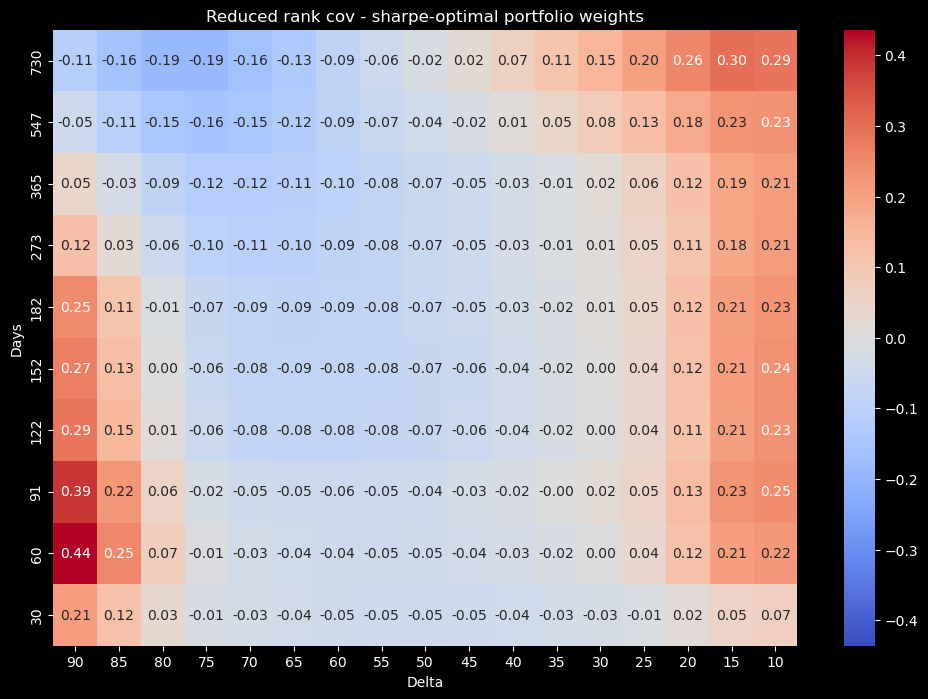

In [24]:
full_cov_opt_pf = pd.Series(reduced_rank_cov_inv@mapped_alphas, index=cov_df.columns)
plot_heatmap(full_cov_opt_pf, "Reduced rank cov - sharpe-optimal portfolio weights")

In [25]:
print(f'Full-rank covariance conditioning number {np.linalg.cond(cov_matrix)}')
print(f'Reduced-rank covariance conditioning number {np.linalg.cond(reduced_rank_cov)}')

Full-rank covariance conditioning number 138631559328.6456
Reduced-rank covariance conditioning number 5.4289855379119055e+19


Side length: 170, PCA computation time: 0.016366004943847656 seconds
Side length: 340, PCA computation time: 0.027410507202148438 seconds
Side length: 510, PCA computation time: 0.05270886421203613 seconds
Side length: 680, PCA computation time: 0.0987701416015625 seconds
Side length: 850, PCA computation time: 0.2221965789794922 seconds
Side length: 1020, PCA computation time: 0.2427537441253662 seconds
Side length: 1190, PCA computation time: 0.39245057106018066 seconds
Side length: 1360, PCA computation time: 0.5830047130584717 seconds
Side length: 1530, PCA computation time: 0.7858924865722656 seconds
Side length: 1700, PCA computation time: 1.0897700786590576 seconds


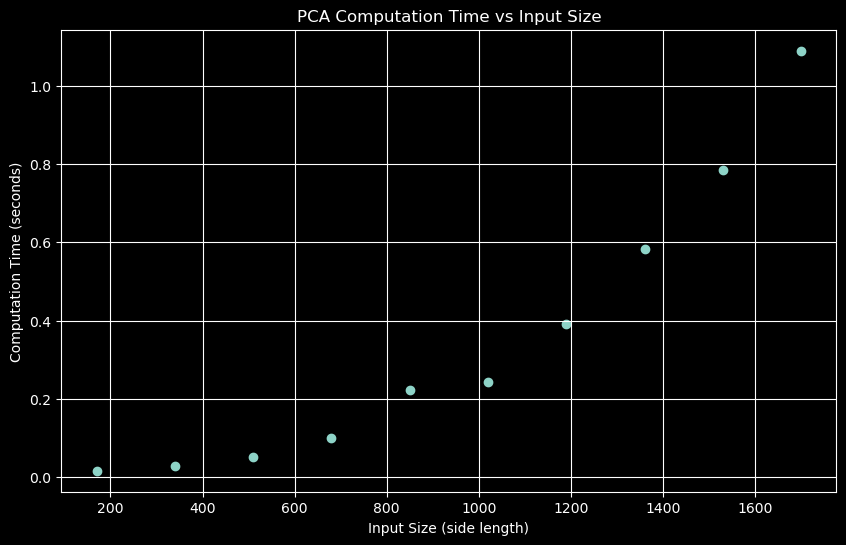

In [26]:
import numpy as np
import time
from sklearn.decomposition import PCA

# Create a 2D square grid of random standard normal values
random_grid = np.random.standard_normal((500, 500))
# Initialize lists to store side lengths and computation times
side_lengths = []
computation_times = []

# Loop over side lengths from 170 to 170*100
for side_length in range(170, 170*11, 170):
  # Create a 2D square grid of random standard normal values
  random_grid = np.random.standard_normal((side_length, side_length))
  
  # Time the PCA computation
  start_time = time.time()
  
  # Run PCA
  pca = PCA()
  pca.fit(random_grid)
  
  end_time = time.time()
  
  # Record the side length and computation time
  side_lengths.append(side_length)
  computation_times.append(end_time - start_time)
  
  # Print the side length and time taken
  print(f"Side length: {side_length}, PCA computation time: {end_time - start_time} seconds")

# Plot the input size versus time scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(side_lengths, computation_times, marker='o')
plt.xlabel('Input Size (side length)')
plt.ylabel('Computation Time (seconds)')
plt.title('PCA Computation Time vs Input Size')
plt.grid(True)
plt.show()